# Hello Bot

### Import Libraries

In [ ]:
# pip install playsound==1.2.2

In [43]:
from ultralytics import YOLO
from pathlib import Path
from playsound import playsound       #소리 출력
from PIL import Image
import os
import threading   #여러 작업을 동시에 병렬로 실행하거나 백그라운드에서 실행
import time        #시간 측정
import cv2 

### Converted Model

In [2]:
ov_model = Path("models/yolov8n_openvino_model/yolov8n.xml")
if ov_model.is_file():
    print("OpenVINO model already exists.")

else:
    # Load a YOLOv8n PyTorch model
    model = YOLO("models/yolov8n.pt")
    
    # Export the model
    model.export(format="openvino")  # creates 'yolov8n_openvino_model/'

OpenVINO model already exists.


### Load Model

In [44]:
det_model = YOLO("models/yolov8n_openvino_model", task = "detect")

#### Test Model

Loading models\yolov8n_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 C:\BrainAI\HelloBot_test_yolov8n-WIP (2)\data\coco_bike.jpg: 640x640 2 bicycles, 2 cars, 1 dog, 157.5ms
Speed: 13.5ms preprocess, 157.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
No Person Detected


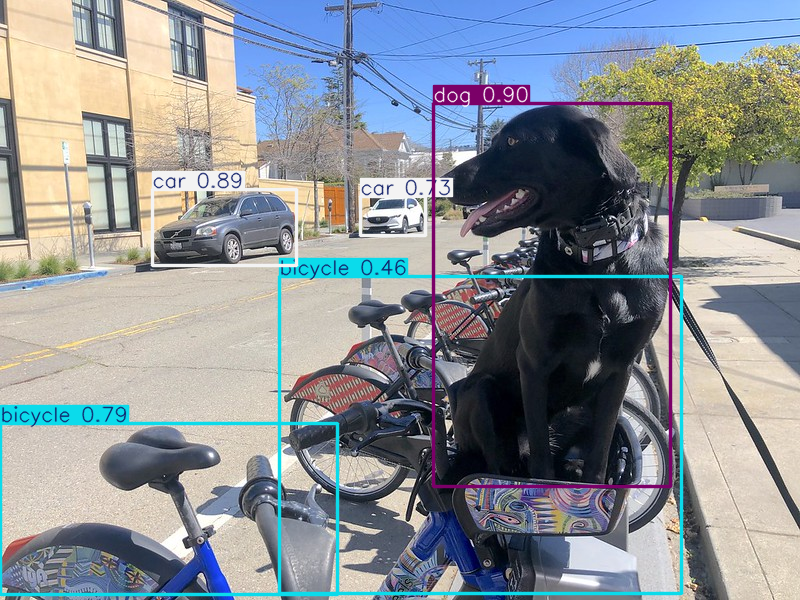

In [45]:
result = det_model("./data/coco_bike.jpg")

if 0 in result[0].boxes.cls:
    print ("Person Detected")
    #print( result[0].boxes.cls)

else:
    print("No Person Detected")
    
Image.fromarray(result[0].plot()[:, :, ::-1])

# Deployment

In [46]:
current_dir = os.getcwd()
file_path = current_dir + '/data/hello_intel.mp3'
 
def sayHello():
    playsound(file_path)

#### Play Sound File

In [47]:
sayHello()

### Video

In [48]:
# 전체 화면 설정
def Main():

    camera = cv2.VideoCapture(source)
    
    #1970년 1월 1일(UTC) 기준으로 현재까지 경과된 시간을 초 단위로 반환
    tic = time.time()    
    
    while(True):
        ret, frame = camera.read()
    
        if not ret:
            break
    
        result = det_model(frame, verbose=False, conf = conf_threshold)
        output_image = result[0].plot()
    
        if 0 in result[0].boxes.cls and time.time() > tic + 15:
            threadHello = threading.Thread(target=sayHello)
            threadHello.start()
            tic = time.time()

        cv2.imshow("HelloBot", output_image)
        if cv2.waitKey(1) & 0xFF == ord(' '):  # 스페이스 바가 감지되면 중지
            break
    
    camera.release()
    cv2.destroyAllWindows()

In [49]:
source =  0
conf_threshold = .3

if __name__ == '__main__':
    Main()

## Emoji 출력하기

In [58]:
# 전체 화면 설정
def Main():

    camera = cv2.VideoCapture(source)
    tic = time.time()
      
    while(True):
        ret, frame = camera.read()
    
        if not ret:
            break

        height, width, _  = frame.shape
        
        result = det_model(frame, verbose=False, conf = conf_threshold)
        output_image = result[0].plot()

        # 이모지 아이콘 설정
        emoji_data = 'emoji/face.jpg'

        if 0 in result[0].boxes.cls :          #사람을 인식하면
            emoji_data = 'emoji/smile.jpg'     #이모지 아이콘 변경
        
        emoji_image = cv2.imread(emoji_data)   #이모지 불러기기
        resized_emoji_image = cv2.resize(emoji_image, (160, 140))  #이모지 사이즈 조정
        
        if 0 in result[0].boxes.cls and time.time() > tic + 15:
            if len(result[0].boxes.cls) >= 1 :   #사람이 1명 이상이면...
                
                threadHello = threading.Thread(target=sayHello)
                threadHello.start()
                
            tic = time.time()
            
        #출력값에 이모지 아이콘 overlay 
        output_image[0 : 140, width-160 : width] = resized_emoji_image 
        
        # 화면에 프레임 출력
        cv2.imshow('HelloBot', output_image)
        
        if cv2.waitKey(1) & 0xFF == ord(' '):  # 스페이스 바가 감지되면 중지
            break
    
    camera.release()
    cv2.destroyAllWindows()

In [59]:
source =  0
conf_threshold = .3

if __name__ == '__main__':
    Main()